In [279]:
#Data Incubator Challenge
#Objective - to obtain data for sidewalk geometry and visualize/cluster them appropriately

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sys import getsizeof
from sodapy import Socrata
#First section of code taken from associated Github site

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofnewyork.us", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofnewyork.us,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
num_lim=2000
results = client.get("52n9-sdep", limit=num_lim)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results) 

1241118

In [36]:
num_lim=2000
#convert the data to float values and 
results_df = pd.DataFrame.from_records(results)
results_df['shape_area'] = results_df['shape_area'].astype('float')
results_df['shape_leng'] = results_df['shape_leng'].astype('float')
results_df['eff_wid'] = results_df['shape_area']/results_df['shape_leng']#divide(results_df['shape_leng'])
results_df['avg_coord_x'] = np.array((np.zeros(num_lim)),dtype=object)
results_df['avg_coord_y'] = np.array((np.zeros(num_lim)),dtype=object)


for i in range(num_lim):
    a = results_df['the_geom'][i]['coordinates']
    value=[]
    for j in range(len(a[0])):
        value.append(np.mean(a[0][j],axis=0))
    
    mean_value = np.mean(value,axis=0)
    
    results_df['avg_coord_x'][i] = mean_value[0]
    results_df['avg_coord_y'][i] = mean_value[1]


C:\Users\matst\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\matst\anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,the_geom,source_id,sub_code,feat_code,status,shape_leng,shape_area,eff_wid,avg_coord_x,avg_coord_y
0,"{'type': 'MultiPolygon', 'coordinates': [[[[-7...",21380000001,380000,3800,Unchanged,1763.887092,12252.910554,6.946539,-73.9975,40.6898
1,"{'type': 'MultiPolygon', 'coordinates': [[[[-7...",21380000002,380000,3800,Unchanged,1004.777693,5784.683784,5.757178,-73.9965,40.6907
2,"{'type': 'MultiPolygon', 'coordinates': [[[[-7...",21380000003,380000,3800,Unchanged,828.312364,2662.091456,3.213874,-73.98,40.7034
3,"{'type': 'MultiPolygon', 'coordinates': [[[[-7...",21380000103,380000,3800,Unchanged,38.361842,77.343809,2.016165,-73.9912,40.6965
4,"{'type': 'MultiPolygon', 'coordinates': [[[[-7...",21380000004,380000,3800,Updated,5063.776578,31976.407120,6.314735,-73.9791,40.6988
...,...,...,...,...,...,...,...,...,...,...
1995,"{'type': 'MultiPolygon', 'coordinates': [[[[-7...",2380000166,380000,3800,Unchanged,1335.784429,3684.899094,2.758603,-73.9321,40.5952
1996,"{'type': 'MultiPolygon', 'coordinates': [[[[-7...",2380000155,380000,3800,Unchanged,2436.595342,6264.801048,2.571129,-73.9293,40.5925
1997,"{'type': 'MultiPolygon', 'coordinates': [[[[-7...",2380000156,380000,3800,Unchanged,944.577181,4835.320945,5.119032,-73.9347,40.5925
1998,"{'type': 'MultiPolygon', 'coordinates': [[[[-7...",2380000195,380000,3800,Unchanged,617.324619,2566.150908,4.156891,-73.9403,40.6021


In [203]:
final = results_df[["eff_wid","avg_coord_x","avg_coord_y"]]
final = final.sort_values(by=['eff_wid'])

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
final_scaled = sc.fit_transform(final)


#X = list(final['avg_coord_x'])
#Y = list(final['avg_coord_y'])
#Z = list(final['eff_wid'])

X = list(final_scaled[:,0])
Y = list(final_scaled[:,1])
Z = list(final_scaled[:,2])

#Create 2D array from Z to plot a contour
ZZ=Z*np.eye(len(X))

array([[-1.73419566e+00,  5.26428398e-01, -7.81057801e-01],
       [-1.71599160e+00, -1.10320091e+00,  1.23342694e+00],
       [-1.67232588e+00,  5.25049823e-01, -7.83434566e-01],
       [-1.65850977e+00,  5.30213135e-01, -8.06346756e-01],
       [-1.64114755e+00,  6.05237517e-01, -7.46419049e-01],
       [-1.60163710e+00,  4.87680465e-01, -8.01434022e-01],
       [-1.59245092e+00,  5.33531780e-01, -8.04804739e-01],
       [-1.58896942e+00,  1.38534917e+00, -2.71160231e-01],
       [-1.56176266e+00, -1.17548856e+00,  1.08613496e+00],
       [-1.54490412e+00,  5.31341947e-01, -8.04044291e-01],
       [-1.52206109e+00, -1.06308139e+00,  1.22672079e+00],
       [-1.51313305e+00, -5.83787228e-01, -5.61381722e-01],
       [-1.50667785e+00, -3.86368358e-01, -2.40730470e-01],
       [-1.50032825e+00, -6.10568581e-01, -5.66485092e-01],
       [-1.48826984e+00, -1.10602142e+00,  1.23287770e+00],
       [-1.48047359e+00, -1.22821927e+00,  1.53169572e+00],
       [-1.47911460e+00,  6.84983576e-01

Text(0.5, 1.0, 'Scaled Relative Widths vs Coordinates')

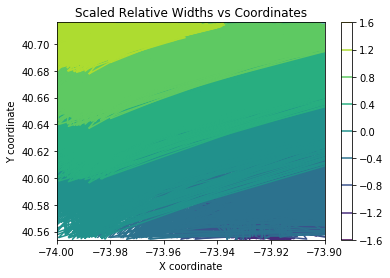

In [185]:
#Plot contour to see how the effective widths of feature vary
cont = plt.contour(X,Y,ZZ)
plt.ylabel('Y coordinate')
plt.xlabel('X coordinate')
#plt.xlim((-2, 2))
plt.xlim((-74, -73.9))
plt.colorbar(cont, extend='both',spacing='proportionate')
plt.title('Scaled Relative Widths vs Coordinates')

In [226]:
#Calculate SSE or Inertia for different number of clusters
sse=[]
for k in range(1,20):
    km = KMeans(n_clusters=k).fit(final_scaled)
    sse.append(km.inertia_)


ValueError: Expected 2D array, got 1D array instead:
array=[-0.7810578   1.23342694 -0.78343457 -0.80634676 -0.74641905 -0.80143402
 -0.80480474 -0.27116023  1.08613496 -0.80404429  1.22672079 -0.56138172
 -0.24073047 -0.56648509  1.2328777   1.53169572 -0.78051301  1.29593274
 -0.66211105 -0.58070553 -0.58229718 -0.36179478 -0.22377954 -1.26558808
 -0.43700773  1.32079031 -0.42372204 -0.7082554  -0.49977757 -0.80697572
 -0.24400574 -1.04320421 -0.22524546  1.29232865 -0.71507099 -1.08287489
  1.29556105 -0.25116565 -0.51131952  1.23440345 -0.23784647 -1.1944991
  1.18714668 -0.67413085  1.11469716  1.22753303  1.22878438  1.12364706
  1.22841358 -0.45055366 -0.71844999 -0.50287461 -0.7440081  -1.07989965
 -1.01166335  1.35714877 -0.43865107 -0.4401636  -0.79717085  1.55832536
 -0.78197759 -0.81219506 -0.91067267 -0.79913793  1.20203768 -0.5715944
 -0.77988048  1.44752983 -0.74906135 -0.74622496 -0.75119985 -0.71229609
 -0.98279932 -0.77455807 -0.6110678  -0.59134821 -0.85875088 -0.75589401
 -0.43821793 -0.97039903 -0.99705077 -0.3159225  -0.80860532  0.70761097
 -1.11823563 -0.60593752 -0.69873568 -0.27180761 -0.26216197 -0.74387839
  1.43287725 -0.45226934 -0.56994869 -0.54010074  1.22825768  1.267695
 -0.96062463 -1.19561024 -0.71833277 -0.72267079 -0.43212036  1.22644415
 -0.98008702 -0.72200281 -0.2340438  -0.58029605  1.29368834 -0.65463503
 -0.98944425 -0.97744586  1.35846983  1.51171793 -0.73950259 -1.19504497
 -0.51295048 -0.99444205 -1.24976654 -0.72212478 -1.0329578  -0.82979608
  1.17455586  1.33601115  1.26604536 -0.72067198 -0.84442579 -0.88693488
  1.23047133 -0.81594692  1.22635918 -0.57026813 -0.60617641 -0.53256336
 -0.63097392 -0.56739606 -1.00875462 -0.58993819  1.22572363 -0.74125985
 -0.37777655  1.50738568 -0.37435713 -0.67798546 -0.48694717 -0.5933572
 -0.53214286 -0.70155053  1.20729708 -0.63896498 -0.76216532  1.20951883
  1.26947752 -1.02808405 -1.20801222 -0.429036   -0.83112537 -0.62849635
 -0.60235348 -0.77616696 -0.66566443  1.5439954  -0.55292189 -0.55236665
 -0.80646262 -0.52430185 -0.14792614 -0.53985076 -0.81025124  1.38272869
 -0.5137682  -0.64002786 -0.71877732 -0.8508438  -0.75587687 -0.44040504
  1.50816046 -1.26841171 -1.19233193 -0.97447997 -0.4818061  -1.19429467
 -0.27183623 -0.37790257 -0.63531336  1.50631245 -0.31944995 -0.69776327
 -0.52846633 -0.53807099 -0.70469469  1.17463414 -0.79862725  1.22652654
 -0.5213397  -0.99384994  1.26067988 -0.55464615 -0.89100608 -0.65459528
 -0.32713057 -0.77585616 -0.52503559 -1.19489684  1.20963926 -0.54496551
 -0.75558615 -0.52370586 -0.7982443  -0.67593125  1.13522671 -0.4568294
 -0.72714119 -0.80860282 -0.45710967 -0.70579147 -0.68383558 -0.72508621
 -0.57935063  1.20721164 -0.70993361 -0.55264153  1.54005441  1.45794448
 -0.63343466 -0.55908187  1.25914619 -0.995148    1.24535879  1.33989688
 -0.82408594 -0.80523447 -0.58626557 -0.57353322 -0.36223242 -0.2955485
  1.29997819 -1.20575025 -0.55096709 -1.30060027 -0.55205298 -0.51312601
 -0.68687826 -0.35761141 -0.70297818  1.33549186 -0.50335087  1.15966836
 -0.81495703 -1.0315503  -1.23403863  1.297974   -1.20902025 -0.51538868
 -0.69404059 -0.56671094 -1.04191622 -0.83790988 -0.52357072  1.22348332
 -0.81572476 -0.5657018  -0.6196083  -0.70906418 -0.70942014 -0.62587611
 -0.53514396  1.50131456 -0.70771003  1.26098507 -0.43012745 -1.01204079
 -0.32004074  1.52711784  1.51066955  1.38336995 -0.74224992 -1.00619578
 -0.35408635 -0.28975037 -0.28296506 -0.7145664  -0.61312942 -0.54632855
 -1.03738941 -0.33750505 -0.72323585 -0.42661727 -0.72228063 -0.72892121
 -0.58133451 -0.63454449 -0.72152304 -0.72699529 -0.70671789 -0.50182199
 -0.5647234  -0.62473346 -0.50269979 -0.5367984  -0.59171664 -0.70508166
 -0.80335096  1.51305538  1.5379764   1.28590299 -0.72902436 -1.03607437
 -0.77649071 -0.7148755  -0.56872269  1.50059101 -0.67679065 -0.7234244
 -1.05973229 -0.59015558 -0.61250118 -0.51003827 -0.56702168 -0.53697005
  1.27496044 -1.00761692 -0.66921672 -0.56562005 -0.70371173 -0.71926533
 -0.5101659  -0.78611684 -1.01338564 -1.19592755 -0.70183741 -1.02501748
 -0.99969025 -0.76095257 -0.63461532 -0.58092651 -0.80965783 -1.08625071
  1.23034084 -1.01926821 -0.72164721 -0.3557137  -0.7347185   1.30040292
 -0.32534858 -0.77268577 -0.69858088 -0.53545422 -0.72439634 -1.08733813
 -0.63330085 -0.57944238 -0.83143867 -0.91994774 -1.01783523 -0.60454037
 -0.5810598  -0.72756151 -0.60160721 -0.77106173 -0.72541226 -0.57246646
 -0.67128463 -0.74706011 -1.27870209  1.11440174 -0.62230489  1.16284146
  1.35858672 -0.56946682 -0.44504248 -0.93233541 -0.59283966 -0.70230384
 -0.73016128 -0.33065556 -0.784374    1.18600351 -0.59097202 -0.33168995
 -0.59384924 -0.49217793 -0.72655287 -0.74008999  1.2984798  -0.57175317
 -0.48712224 -0.81113585 -0.56312053 -0.57440508  1.1626491  -0.72313044
 -0.72879343 -0.6947027  -0.44703338 -0.62544373 -0.59548705 -0.6427285
 -0.54487504  1.37754453 -0.6344258  -0.56647332 -0.70466618  1.27509543
 -1.00171039 -0.42900526 -0.66132073 -0.57096288 -1.02372515 -0.63013844
 -0.7078052  -0.52400879  1.49367275 -0.60093135 -0.70014496 -1.00449137
 -0.35551591 -1.27607643 -1.08142313 -0.52389295 -0.55988661 -0.547429
 -0.3286736  -0.56014783 -0.46348027 -0.73718385 -0.28398448 -0.45376755
 -0.70926361  1.47088985 -1.19910937 -0.55850496 -0.64555698 -0.67947552
 -0.56462214 -0.75580474 -0.58904475 -0.45726222 -0.56527249 -0.7144251
 -0.36143072 -0.82175565 -0.6184169  -0.35077574 -0.68509963 -0.74853907
 -0.74732687 -0.54184187  1.1832809   1.23728076 -0.24517471 -0.96388966
 -1.22388183 -0.66964405 -0.87978954 -0.41650605 -0.44034453  1.53502126
 -0.49316969 -0.30413645 -0.56142222 -0.62331873 -0.59942764  1.5473499
  1.13851635 -0.36387266 -0.63526354 -0.57298116 -0.70101292 -0.7260007
  1.23431635 -0.56993233  1.52233771 -0.43868392 -0.76832731 -1.28173236
 -0.43331314 -0.445798   -0.39395093 -0.72434855 -0.61543835 -0.60883455
 -0.4268706  -1.03177774 -0.77662074 -0.67353317 -0.81060958 -0.3657072
 -0.72670872 -0.27875934 -0.79910641 -0.78494611 -0.65868155 -0.56476293
 -0.36339707 -0.55712304 -0.92644947 -0.88442052 -1.19529682 -0.2732222
 -0.5941906  -0.81441578 -0.41200698 -0.6336551  -0.70425106 -0.35221427
 -0.68892698 -0.47546704 -0.67325383 -0.72442519 -1.02949519 -0.54629212
 -0.30342469  1.4578396  -0.70505454 -0.47927629 -1.07169522 -0.6815658
 -0.4448538  -0.45671816 -0.42511152 -0.34279375 -0.40682545 -0.38986996
 -0.56099858  1.56773757 -0.29018231 -0.39278427 -0.71962986 -0.48439732
 -0.76191379 -0.57645457 -0.39247256 -0.36597756  1.10380585 -0.73256421
 -0.44199585 -0.58077761 -0.46059167 -0.723905   -0.92624966 -0.26221401
 -0.77549695 -0.65820881 -0.3470182  -0.72816211  1.15338815 -0.33355267
 -0.6963712  -0.68806902 -1.17356493 -0.71618226  1.44174127  1.39929393
 -0.42202553 -0.61556817 -0.56051403 -0.80570296 -1.22490769 -0.88387337
 -0.38570463 -0.71123071 -0.42321193 -0.30915829 -0.72737603 -0.69084562
 -0.85650209 -0.63414004 -0.82639135 -0.26615735  1.55655602 -0.7200618
 -1.26967049  1.23033987  1.24624885 -0.56415552 -0.55398834 -0.3911367
 -0.59812338 -1.19502304 -0.55467324 -0.40979738 -0.61770572 -0.3386022
 -0.74175315 -0.41196711 -0.5802665  -0.73232581  1.11854009 -0.68030834
  1.53864506 -0.81969736 -0.83205281  1.18920103 -0.57278511 -0.70659379
 -0.74897522  1.20966936 -0.27686307 -0.51053523 -0.73806028 -0.66264784
 -0.56130141 -0.3697015  -0.31990557 -0.62168297 -0.8878858   1.55755821
 -0.78331007  1.39537696 -0.76846301 -0.3494997  -0.46545915 -0.56515376
 -0.6566799  -0.55673788 -0.36789339 -0.47152773  1.55972994 -0.72411711
 -0.28948596 -0.45668371 -0.84461914 -0.60651864 -0.91774482 -0.86987525
 -0.88828537 -1.22731514 -0.45119333  1.18402814 -0.37892855 -0.33398817
  1.16527802  1.46780396 -0.51463436 -0.76299573 -0.5263488  -0.27579306
 -0.89520392  1.11283266 -0.77816526  1.27954133  1.39704218 -0.8770731
 -0.52054531 -0.73593779 -0.65159386 -0.50693453 -0.92764811 -0.3552607
 -1.00594129 -0.68839961 -0.72468111 -0.67130649 -0.76071319 -0.53264389
 -0.82173843 -0.84945476 -0.62316956 -0.63581    -0.33024722  1.23113355
 -0.35277608 -0.88525151 -0.7115765  -0.91372414 -0.41792986 -0.67807315
 -0.42254237 -0.84556088 -0.41654003 -1.29087733 -0.67449435 -0.92257385
 -0.57009382  1.53272631 -0.73890866 -0.60988115  1.47796127 -0.76699566
 -0.56996833 -0.89669448  1.56856631 -0.88354892 -0.50532292  1.53442053
 -1.19139655 -0.89677969 -0.86317815 -1.29283844 -0.64971666 -0.26196665
 -0.54574673  1.17475184 -0.58506466 -0.91292119 -0.55632121  1.27139375
  1.55626204  1.39291715 -0.83043947 -0.67568709  1.54422124 -1.22056063
 -0.90021161 -1.02855394 -0.7265134  -0.62044471 -0.60811971 -0.55418152
 -0.32540402 -0.75743292  1.31026475 -0.76497343  1.27115009 -0.52912968
 -0.28234208 -1.00223634  1.24404734 -0.96336159 -0.3510002  -1.19729121
 -0.41933915 -0.40416418 -0.8427016   1.33807617 -0.35363946 -1.20271424
 -0.39033092 -0.66811237  1.55024024 -0.75151212 -0.94506669 -0.60477309
 -1.16409934 -0.45407336 -0.52132101 -0.26345703  1.29731827 -0.64828004
  1.27292193 -0.5056741  -0.55893504  1.31311445 -0.30406729 -0.63223235
  1.29927847  1.20728589 -1.22562218 -1.19771668  1.31128057 -0.72898402
 -0.33411245 -0.73225488 -0.59798042 -0.55732025 -0.69735095  1.14120196
 -0.42201085 -0.7755785  -0.67725838 -0.47058921 -0.94125836 -0.3519575
 -0.75490709 -0.49222164  1.25414637 -0.68408414 -1.21959742 -0.75794074
 -0.70015005 -0.46575515  1.41780755 -1.0615603   1.44687483 -0.82388874
 -0.57329022 -0.3161386  -0.46749916 -0.58092501 -0.98797063 -0.59457141
 -0.55632003 -0.22890792 -0.42557944 -0.88024422  1.56172316 -0.81698133
 -0.5087083  -0.46057963  1.30246967 -0.71792819 -0.84096768 -0.72699405
  1.3785184   1.33598876 -0.38620126 -0.68079198  1.1564361  -1.1974129
 -0.546539   -0.45651994 -1.02287484 -0.93340643 -0.66696447  1.22646612
 -0.6977324  -0.98009492 -0.57779082 -1.19909625 -0.55393057 -0.69017115
 -1.22929506 -0.35970063 -0.63664247 -0.36497614 -0.58858634 -0.83371468
 -0.72265258  1.2250431  -0.904207   -0.58513938  1.46465256 -0.84922244
  1.52504246 -0.95388197  1.3460647  -0.98243205  1.45704034 -0.69324254
 -0.52034697 -1.05315286 -0.85350714 -0.85848689 -0.98443888 -0.66081679
 -1.00040717  1.38122123 -1.02027491 -0.90574307 -0.6794014  -0.89351033
 -0.9580977  -1.04387927  1.23846263 -0.98795768  1.49447029 -0.30798097
 -0.59831558  1.46348009 -0.58202746 -1.19827036 -1.30591685  1.3124936
 -0.95227618 -0.3898716  -1.1976138  -0.78939647  1.55418807 -0.60562327
 -0.54736434 -1.28261614 -0.38757183 -0.84998988 -0.71133179 -0.85474386
 -0.60485404  1.25921291 -0.51765241 -0.58704124 -0.91848408  1.40359282
  1.44620259 -0.87720925 -0.86893578 -0.82319145 -0.6366483  -0.94683964
 -0.78306811 -1.01300232 -0.99497039 -0.78986703 -0.54908588 -0.75470768
 -0.42949096 -0.5439469  -0.56745063 -0.48859775 -1.31275728 -0.71381365
 -0.37351046 -0.82813611 -0.39702634  1.56662138 -1.19853743  1.15528964
 -0.74073935  1.43353031 -0.91739754 -0.44573361 -0.55105268  1.4374277
 -0.51780544 -0.49738653 -0.97086028 -1.0012182  -0.46250615 -0.74372341
 -0.54255742 -0.39826601 -0.5146337  -0.502931   -1.26885753 -0.73183335
 -0.52516706 -0.99543997 -0.38318121 -0.45820838 -1.19762262  1.38382373
  1.16065133 -0.84215552 -1.2331679  -0.57375599 -0.78649581 -1.19088712
  0.74120556 -0.55118882 -0.62904596  1.23968039 -0.93569663 -0.35559203
 -1.30240463 -0.27143607 -0.7697119  -0.90125669 -0.99161435 -0.31157159
 -0.46708742 -0.56370142 -0.92326023 -0.51793954 -0.5091365  -0.56041206
 -0.37710572 -0.47127698 -1.02199833 -0.84776762  1.33762027  1.14878151
 -0.76094938 -0.50497903 -0.99687155 -0.90770114 -0.57306671 -0.94205088
  1.33238289 -0.86786757  1.27445546 -1.29670494 -0.73326164 -0.87459678
 -1.07649944 -0.62699302 -0.53859088 -0.82791133 -0.4661912   1.45603313
 -0.49311436 -0.75008752 -0.72194141 -0.54831766 -1.02165532  1.3515474
 -0.51536809 -0.66634047 -0.58152779 -0.56838952 -0.91861648 -0.56559759
  1.08865252 -0.63657298 -0.66337169 -0.48930051  1.18039705 -0.46616402
 -0.84647588 -0.47922296 -0.45269034 -0.7087377   1.39160397  1.29139955
 -0.59099653 -0.86611074 -1.17539289 -0.50237079 -0.48017951 -0.49184982
  1.37031122 -1.29106345  1.44957426 -0.42208522 -0.50638966 -0.28280934
 -1.03794962 -0.57199884 -0.69548818 -1.30659426 -0.4757588  -0.53515242
 -0.78204068 -0.49461721  1.31738957  1.30559526 -0.50680353  0.75270643
  1.29074507 -0.97773862 -1.07045652 -0.43798292 -0.93677719  1.48140012
  1.36038819  1.53188673 -0.42736209  1.48818075  1.25301408  1.34808119
 -0.75429499  1.54611308 -0.93130904 -0.53425171 -1.28297171 -0.67416317
  1.46599787 -0.6599874  -0.58301603 -0.38790754 -0.42212902 -1.21026919
  1.261538   -0.41405997  1.20381118  1.07989684 -0.85142844 -0.56561251
 -0.50122644 -1.31802631 -0.5988538  -0.6933934  -0.43155281 -0.70832475
 -0.52159557 -0.83021289 -1.200889   -0.68234973 -1.0940163  -0.85593139
 -0.31922514 -0.67958806 -0.29711853  1.51359933 -1.20552304 -0.42183788
 -0.44256178 -0.70105775  1.20083728 -0.55095704  1.47575093 -1.28500894
 -1.19663157 -1.22422524 -0.44731674  1.29876159  1.15809024 -0.5999505
  1.50998723 -1.28274295  1.37054151 -0.64703224 -0.57648326  1.56908742
 -0.68666925 -1.28749457  1.57040389 -0.83690917  1.18213181  1.16382291
 -0.86070709 -0.67954217 -0.69557589  1.36107393  1.45367828 -0.65421493
  1.35716426  1.5610617  -0.58129243 -0.95662985 -0.57505506  1.33623225
 -0.38623021 -0.82863432 -0.96805039 -0.58432514  1.47683397 -0.69928666
  1.39753584  1.45014948 -0.82737258  1.50200623 -0.604985    1.29522421
 -0.48607227  1.34450185 -0.30938325 -0.70273436 -0.97438976 -0.62605588
 -0.74301045 -1.22222784  1.50086514  1.58205374  1.44924921 -0.30183944
  1.10309751 -0.53623183 -0.81576575 -0.48471383 -0.53910434 -0.72706474
 -0.64173809 -0.58903113 -1.22520458 -0.50379908 -0.6272832   1.15693414
 -0.42681456 -0.53304539 -0.51429316  1.30541343  1.56384467  1.30158269
 -0.39185133 -0.8347517  -0.38677254 -0.51308507 -0.34182716 -0.62701089
 -0.97362844 -0.55080014 -0.9535325  -0.3576591   1.55188005 -0.46516918
  1.50053028 -0.61864363 -0.86302905 -0.67994775  1.33717917 -0.46406655
  1.24299141  1.30090872 -0.35898531 -0.97652313 -0.55540579  1.16466297
 -1.28774384  1.34537204 -0.58595415  1.44714106 -0.53279161 -0.83697381
 -1.20950967 -0.76688059 -0.53629659 -0.56283703 -0.57859145 -0.72109723
 -0.61205864  1.52282463 -0.60022256 -0.73429637  1.55580773  1.34925966
 -0.49682898 -0.84146979 -0.82178019 -0.63463342 -0.5617574  -0.86615336
 -0.5847293  -0.69745316 -0.79843234  1.38585993 -0.8246584   1.36898977
 -0.35797101 -1.27311806  1.12132729 -1.03552885  1.49612603  1.24881005
 -1.22439996 -0.72302285  1.24952416 -1.23450248  1.39864986 -0.35167111
  1.32891614 -0.88781078  1.47187178 -0.60803953 -0.67822222 -0.31217543
 -0.34114926 -0.5615968  -0.7855517  -0.55557287 -0.68866867 -0.72073256
 -0.47731643  1.08122831 -0.56479758  1.18826059 -0.54766303 -0.35254548
 -1.21349146 -0.83204617 -0.92774992 -0.76390255 -0.55226199  1.44892007
  1.09242676 -0.84130628 -0.88333437 -0.68159677 -1.16227317  1.26426758
 -0.51593091 -1.16626704 -0.49919778 -0.66306378 -0.58419329 -0.56251341
  1.35519729 -0.80204835 -0.51758562 -1.21414749 -0.77729271  1.35776445
 -0.71019119  1.2833108  -0.88242769  1.2300186  -0.69664515 -0.66072369
 -0.48026815  1.29813649 -0.6368925  -1.21011502 -0.5688274  -0.89718368
  1.11800129 -0.59956345 -1.17903605  1.28467027  1.45967704 -0.65365163
 -0.50099905 -0.30132466 -0.43198641  1.23392982  1.43501191 -0.73935464
 -0.78245704 -0.57926858 -0.41248787  1.2232831   1.38186948 -0.56752955
 -1.29982688 -0.677801    1.12599786 -0.38576261 -0.67562761 -0.62641368
 -0.5809906  -0.87823645  1.40348239 -0.70229832 -0.71564573 -0.7165221
 -1.19758016  1.37339711 -0.64491051 -0.55082809 -0.27624517 -0.65833794
 -1.28456284 -0.70662145 -0.70518988 -0.79339531  1.47101437 -0.66600864
  1.35957395 -0.69468304  1.36907439 -0.48545463 -0.67702012  1.56054869
 -0.71500654 -1.31951331 -0.62762552 -0.70704773  1.47497933  1.19435714
 -1.26727677 -0.54831478  1.25552105 -0.2600625  -0.6576745  -0.76634597
 -0.69257342  1.10107699  1.30767861 -0.56137176  1.0984978  -0.87223193
 -0.44404615  1.24489209 -1.29282538  1.36992176 -0.25671214 -0.70202299
 -0.53533094 -0.6956336  -0.76369044  1.20234087  1.26767613  1.21487679
 -0.82645295 -0.57940974 -1.27743223  1.31829733 -0.71430266 -0.6054657
 -0.62458171  1.42903008 -0.62830332  1.44230401 -0.68786793  1.14659653
 -0.57723325 -1.03349983 -0.68414257 -0.68195888 -0.79033821 -1.30090627
 -0.7098773   1.42449937 -0.32278258 -0.32341368 -0.72531623  1.565351
  1.47771815 -0.65786746  1.08234495  1.35305262  1.54138844 -1.22303327
  1.34291128 -1.3131186  -0.74869202 -0.62479184  1.45523397 -0.45481084
  1.56308538 -0.59833962 -0.66688273 -0.8504529  -0.90377287 -0.62650713
  1.34795569  1.23730488 -0.69498835  1.43419808 -1.28962235 -0.42311658
  1.40653972  1.51169469  1.54528988  1.35883153  1.26746848 -1.02589282
  1.13536636  1.44307211 -0.73515639 -0.52004466 -0.34590363 -0.7819892
 -0.59586681 -0.48230322 -0.43205669 -0.5579264  -0.58742618  1.27342518
 -0.68355005  1.2169216  -0.56384306  1.2281709  -1.04940897  1.23813975
 -1.1976651   1.35744185  1.36804343  1.20596104 -0.91979532 -1.08951193
  1.20607456  1.2938874   1.49680753  1.10582725  1.45123483 -0.53120708
  1.22927732 -0.9148631   1.53384191  1.30373408  1.37108985  1.08305877
 -0.60221345 -0.85980551 -0.54348059 -0.83503751 -0.44946489  1.46817209
 -0.937991    1.41724256  1.23902984  1.51349056  1.43777989 -0.65396598
  1.33567686  1.33414462  1.40931511  1.16936241  1.28722331  1.18226379
  1.35630534  1.46497087 -0.57228704 -0.89197116  1.35937266 -0.74955435
  1.31790858  1.58297985 -0.73504883 -1.1919305   1.26224782  1.58644033
  1.5370559   1.45911152  1.55268693 -0.43426844  1.57558963 -0.39083361
  1.31755964 -1.28826963  1.35918772 -1.19741408  1.26933363  1.28127551
  1.5186313  -0.76277615  1.26238847  1.23992012 -1.1305598  -0.71510592
  1.5211011   1.1094334  -0.69759463  1.2482362  -1.01761033 -0.77949362
  1.31103409  1.34661365 -1.15263856 -0.58425086  1.47169293 -0.360676
  1.43934067 -0.62332616  1.08814404  1.4333172   1.31054405  1.4578406
 -0.63724774  1.46136124 -1.2249857   1.54983329  1.43522908 -0.89690013
 -1.27569779  1.29065576  1.56894631 -0.27196661 -0.48203504  1.0794638
  1.48649531  1.43219115 -0.68574945 -0.79510619 -0.65900384  1.10129083
  1.09313688  1.48066048  1.38591567  1.13660543  1.21729218 -0.41475968
  1.46628506 -0.63344428 -0.68443607 -0.90837699 -0.91839083  1.34504394
  1.33122453  1.57250748  1.4365986   1.48385526  1.54049246  1.17164903
 -0.47517574 -0.67648003  1.5807819   1.34974289  1.57331417 -0.30926139
  1.22216617  1.37666916  1.2329894  -0.73291559  1.21674215  1.31623186
  1.0920381   1.47489654  1.57858004  1.11377736  1.46679777  1.470738
  1.55981653  1.13032457  1.16511953  1.17278948  1.30608879  1.54390128
  1.23227819 -0.74648451 -0.75265735 -0.60579635  1.52221964  1.25695494
 -0.65600402  1.20429009  1.26162826  1.22466407 -0.81003777  1.48693376
  1.52637929  1.24513336  1.50642537 -0.63235771 -0.58698443 -1.23760777
 -1.2451611   1.46421308  1.1653185   1.4265366   1.35278697 -0.6606109
 -0.62477812  1.35983167 -0.63661072 -0.74705513  1.30495333 -0.65175577
 -0.60287022 -0.53661589  1.20509915  1.49012579  1.40386777  1.57495417
 -0.81535177 -0.43718234  1.26874114 -0.87046731  1.22310942 -1.09366065
  1.57614395  1.31925307 -0.76850388  1.34051582  1.32817851  1.40578887
  1.10084606 -0.8066014   1.16504352 -0.59297889  1.16301844  1.53203902
  1.42370403 -0.5901186   1.38538991 -0.79907704  1.56465911  1.40111718
  1.09229732  1.13880695 -0.46366873  1.44493251  1.31312781  1.57774519
  1.24129276  1.3406871   0.39258226 -0.49960572  1.34917623  1.49588687
  1.13592198  1.54134065  1.14284012  1.08449878 -1.06948184 -0.74010602
 -0.65200043  1.11463789  1.47166727  1.49447462  1.44228741  1.31843567
  1.18894884 -0.69154583  1.40051636 -0.90077703  1.12490138  1.45500682
  1.10381079  1.36601339  1.33288418 -0.57967371  1.42785557  1.2097047
  1.46587613  1.29789853  1.30811045 -0.7488225   1.14103653  1.14094481
 -0.83729018  1.44372442  1.54545715 -0.59513706 -0.56800735 -0.87590975
  1.31829489 -0.64284908  1.41320269 -0.60592533 -0.7849917   1.28835124
  1.30138149 -1.09193428  1.1889934   1.27567543  1.57362955  1.54283156
  1.40991278  1.09330812 -0.8402379   1.28948376  1.20552992  1.51188237
 -0.73631134  1.53535436  1.54905138  1.47509901 -0.72844376  1.12601523
  1.52768208  1.53339669  1.12535311  1.54866696  1.29924686  1.28038679
  1.27623176 -0.54877371  1.10780976  1.43021469 -0.88010378  1.42598012
  1.3319758   1.48169582 -0.7824794  -0.663301   -0.57003536  1.16312291
  1.5503267   1.10201321  1.22528567  1.51272933 -0.88978112  1.56622644
 -0.85355832 -0.82360807  1.47966986  1.46754374  1.55229979 -0.7519097
  1.53997403  1.3349039   1.54398681  1.5601289   1.36609182  1.159009
 -1.27592277 -0.77657065 -0.97962806  1.58680978  1.55983026  1.49978014
 -0.83671886 -1.19774928 -0.73689787 -0.75991704  1.53397161 -0.63249825
  1.54384692  1.56275149  1.47360905 -0.5552959   1.11196662 -0.61528183
  1.53746954  1.53162954  1.58431452  1.42151533  1.49351458  1.50302087
  1.12400395  1.52043174  1.37769862 -0.46360168 -0.55772526  1.38861504
  1.29750857  1.5556227   1.09957916  1.22056331  1.22113615  0.33861343
  1.51475323 -0.52930287 -1.27711215  1.17689382  1.22911889 -0.74773012
 -0.72982663  1.5131544   1.43400092 -1.08357423  1.48948662  1.1079332
 -0.65923154 -1.20223985 -0.66846035 -1.2599671  -0.78881505  1.29781787
  1.37352936  1.18251541  1.12212292  1.50314432 -0.62792609  1.51952565
 -0.31906774  1.50785655 -0.82468992  1.11465359 -0.56666424  1.46713338
  1.16754838  1.50726227  1.21329452  1.52990211  1.36757919  1.31359238
  1.57824965  1.1662949   1.52576709 -1.07409843  1.2808971   1.18254479
  1.38516689  1.56180443  1.51358662 -0.5442317  -0.78455926 -1.19583844
  1.36644092  1.13276363  1.14868192  1.114891    1.29299384  1.38560869
  1.52444724  1.51020671  1.18974519 -1.28511556 -0.62655289  1.15252792
 -0.56704062 -1.08381923  1.46395065 -0.76592909  1.56944764  1.1810234
  1.54540265 -0.5814499  -0.60426552  1.42088294  1.33131828  1.40349344
 -0.69408883  1.26174096 -0.56299138  1.07810864  1.38470297 -0.60463618
  1.19661626 -1.23148193  1.18323204  1.49883091 -0.78158187  1.50617636
 -0.52983474 -0.79222517  1.49195449  1.48337537  1.13418728  1.50330455
  1.18401368  1.19699204 -0.46242505 -0.60527248 -0.55648683  1.4139147
 -1.06992455 -0.68157041  1.31122885 -0.56139627  1.57057591 -0.5576686
  1.33268092 -0.53990938 -1.26098069  1.44168138  1.14558913 -0.67490122
 -0.55782945  1.34857577  1.19498953  1.46296669  1.20581721  1.47433787
  1.17644348  1.17532221 -0.82665163 -0.35218612  1.21553505  1.48086906
 -0.62248988  1.15387424 -0.88309876  1.25982075  1.38329608 -0.72588504
  1.08673824  1.33802681 -1.21555801  1.39516138  1.39290659  1.2008399
  1.20242149 -1.25702818 -0.46615018  1.20466565  1.2967405  -1.30476413
  1.10381955 -1.26746149 -1.28114822  1.25412842 -0.56039033 -1.26144849
 -0.74272706  1.49696662  1.31280591 -1.2558001   1.41243764 -1.0842011
  1.42160326  1.55069703  1.49250021  1.2796304   1.54385252 -0.61061791
 -0.60477208  1.17533374  1.21399527  1.1652656   1.52604415  1.42000497
  1.57682765  1.45874796  1.11109259 -1.30986562 -1.10773249  1.42149112
 -0.16839656 -0.81951602  1.12383693  1.54445272 -1.18874564  1.35892464
  1.39775655  1.49762092  1.48761033  1.15131496  1.45855246 -0.62995031
 -0.55428559 -1.2467601   1.58390649  1.49731252 -0.85535736 -0.75046781
  1.26993787  1.13522104 -1.25549268  1.52610953 -1.09538674  1.52459747
  1.24465766  1.35821314  1.57004391 -1.07859391  1.1763543  -0.74146927
  1.18728627 -1.088038   -1.10462635  1.55429883  1.55043981  1.54731795
 -1.10942507  1.56123712  1.52684131 -0.73556643  1.19664791  1.55868437
  1.53086363  1.19432067  1.42531805  1.15493167 -1.12544145  1.16153466
  1.14587771  1.36423794  1.22102386 -1.15680401 -1.10087031 -0.85411542
  1.5705111   1.345582    1.56988899 -1.08462507  1.56648323  1.50276434
  1.37401809  1.35031283  1.4908428   1.37113782 -1.19495286  1.51649036
  1.19630374 -0.51003046  1.33086725  1.55243233  1.54846031 -0.56451099
  1.47231663  1.43967674].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [230]:
sse = []

In [269]:
from sklearn.cluster import KMeans
import numpy as np
i=20

#for i in range(6):
km = KMeans(n_clusters=i, random_state=0).fit(final_scaled)
km.labels_
km.cluster_centers_
km.inertia_
sse.append(km.inertia_)
#km.predict([[0, 0], [12, 3]])

In [270]:
sse

[6000.0,
 1615.2860104845072,
 1058.3410211711123,
 716.4314126958815,
 458.436845172691,
 327.42506912076107,
 233.12179695833777,
 175.76805120293568,
 132.56765601332307,
 109.63631869978381,
 90.08030553116238,
 77.73649619020709,
 66.49909422245906,
 57.14727295590594,
 48.56735786618711,
 42.75657964994845,
 37.88328580662393,
 34.26800534250811,
 30.6924793686309,
 27.03460885248187]

Text(0, 0.5, 'Avg K-Means Inertia per point')

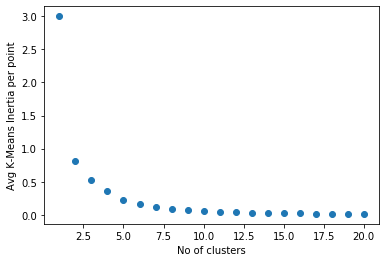

In [276]:
#plot K-Means inertia to see how many clusters should be chosen
plt.plot(list(range(1,len(sse)+1)),[n / num_lim for n in sse],'o')
plt.xlabel("No of clusters")
plt.ylabel("Avg K-Means Inertia per point")